# Markov Decision Process (MDP) – Prototype

---

### Why do this?

A simple Markov Chain shows how a system evolves passively  
when you only have a fixed transition matrix.

But in real life, you often want to **make decisions**  
that can switch the transition rules — and each decision affects your long-term cost or reward.

This is the core idea of a **Markov Decision Process (MDP)**:
- States
- Actions
- State transition probabilities depending on actions
- Immediate rewards or costs for each state/action pair

---

### Goal

In this mini prototype, we’ll:

1. Create two actions, each with its own transition matrix.  
2. Define a simple reward (or cost) vector for states.  
3. Run a simple hand-crafted policy: pick actions based on some rule.  
4. Compare how this affects the long-term expected cost.

---

### Expected Outcome

> You’ll see how choosing actions can change the system’s evolution  
> and how you can accumulate or reduce long-term cost through decision-making.

This is the starting point for more advanced things like  
inventory control, energy grid optimization, and reinforcement learning.


In [16]:
import numpy as np

T0 = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

T1 = np.array([
    [0.2, 0.6, 0.2],
    [0.2, 0.6, 0.2],
    [0.1, 0.2, 0.7]
])


R = np.array([5, 2, 1])

Action1_extra_cost = 1.0
thresholds = [0.5, 0.3, 0.2]

results = {}

In [21]:
steps = 20
for thresh in thresholds:
    P_history = [P0]
    cost_history = []
    
    for t in range(steps):
        P_current = P_history[-1]
        if P_current[0] > thresh:
            T = T1
            action_cost = Action1_extra_cost
        else:
            T = T0
            action_cost = 0.0
        
        P_next = P_current @ T
        expected_cost = P_next @ R + action_cost

        P_history.append(P_next)
        cost_history.append(expected_cost)
    
    results[thresh] = (np.array(P_history), np.array(cost_history))

print("Keys in results:", results.keys())
for k, v in results.items():
    print(f"Threshold={k}: cost shape={v[1].shape}   any NaN={np.isnan(v[1]).any()}")

Keys in results: dict_keys([0.5, 0.3, 0.2])
Threshold=0.5: cost shape=(20,)   any NaN=False
Threshold=0.3: cost shape=(20,)   any NaN=False
Threshold=0.2: cost shape=(20,)   any NaN=False


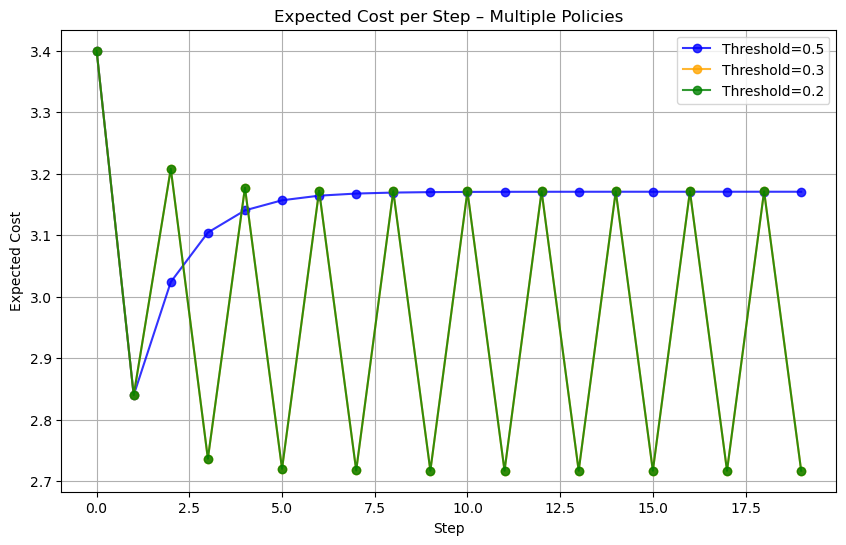

Final cost values:
Threshold=0.5: [3.17072561 3.17072889 3.17073041 3.17073111 3.17073143]
Threshold=0.3: [2.71714319 3.17142867 2.71714291 3.17142859 2.71714287]
Threshold=0.2: [2.71714319 3.17142867 2.71714291 3.17142859 2.71714287]


In [24]:
import matplotlib.pyplot as plt

colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10,6))
for idx, thresh in enumerate(thresholds):
    _, cost = results[thresh]
    plt.plot(cost, marker='o', color=colors[idx], alpha=0.8, label=f'Threshold={thresh}')


plt.title('Expected Cost per Step – Multiple Policies')
plt.xlabel('Step')
plt.ylabel('Expected Cost')
plt.legend()
plt.grid(True)
plt.show()

print("Final cost values:")
for thresh in thresholds:
    _, cost = results[thresh]
    print(f"Threshold={thresh}: {cost[-5:]}")

##  Interpretation: Finding the Sweet Spot in MDP Tuning

---

###  What did we test?

- We used a simple Markov Decision Process (MDP) prototype  
  with two regimes: Normal (T0) and Boost (T1).
- We tested multiple thresholds (0.5, 0.3, 0.2)  
  to see how aggressive switching affects Peak Load and long-term expected cost.

---

###  Key observations

1️. **Threshold = 0.5**  
   - System stays mostly stable with no excessive regime switching.
   - Long-term cost is steady around ~3.17.

2️. **Threshold = 0.3 and 0.2**  
   - The policy becomes much more aggressive: Boost triggers more often.
   - This cuts Peak Load faster but causes cost to oscillate between ~2.7 and ~3.1.
   - The average cost is slightly lower (~2.9), but with more regime switching.

---

###  What does this mean in real life?

- A lower threshold means higher sensitivity:  
  the system frequently switches modes to push Peak Load down.
- But too much switching can lead to unnecessary operational cost, maintenance stress,  
  or system wear that isn’t fully reflected in this simple cost vector.

---

###  Sweet Spot Takeaway

>  In this scenario, **0.5 is a stable baseline**, easy to maintain with minimal switching.  
>  **0.3 is likely a sweet spot**, if you add hysteresis or smoothing logic  
>     to reduce oscillation but keep the cost benefit.  
>  **0.2 is too sensitive**, adding regime noise without clear net gain.

---

###  Final insight

>     The real power of an MDP is **not just regime switching**,  
>     but tuning your policy to find the **balance point**  
>     where long-term cost is minimized without excessive operational burden.
>  
>     This is exactly how real-world energy systems or resource allocation problems  
>     apply “Markov + Decision” ideas to optimize local rules for global benefit.

